<a href="https://colab.research.google.com/github/max-dev-eng/ResearchPaperRepository/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

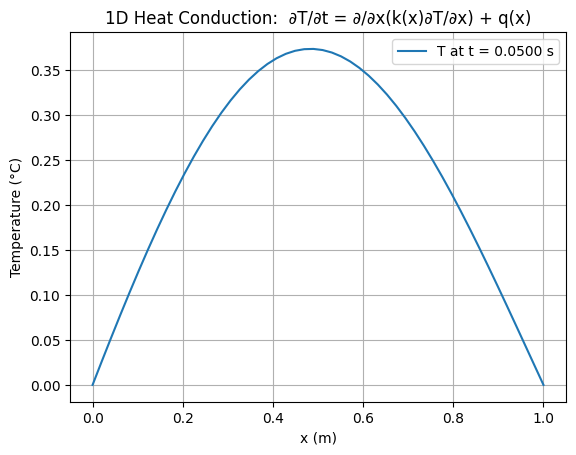

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Problem setup (given)
# -----------------------------
L = 1.0
Nx = 50
dx = L / (Nx - 1)
x = np.linspace(0.0, L, Nx)

# k(x) and q(x) per assumptions
k = 1.0 + 0.5 * x
q = 10.0 * np.sin(np.pi * x)     # constant in time here

# rho*cp = 1  -> alpha = 1/(rho*cp) = 1
alpha = 1.0

# Time settings
dt = 1e-4
Nt = 500

# -----------------------------
# Stability sanity check (explicit)
# A safe sufficient condition is dt <= dx^2 / (2 * alpha * max(k))
# -----------------------------
kmax = np.max(k)
dt_limit = dx**2 / (2.0 * alpha * kmax)
if dt > dt_limit:
    print(f"WARNING: dt={dt:g} may be unstable. Try dt <= {dt_limit:g}")

# -----------------------------
# Initial condition
# -----------------------------
T = np.zeros(Nx, dtype=float)
T_new = np.zeros_like(T)

# Precompute midpoint conductivities k_{i+1/2} for i = 0..Nx-2
k_half = 0.5 * (k[1:] + k[:-1])   # length Nx-1

# -----------------------------
# Time stepping (explicit)
# -----------------------------
for n in range(Nt):
    # Interior points: i = 1..Nx-2 (vectorized)
    T_new[1:-1] = (
        T[1:-1]
        + alpha * dt / dx**2 * (
            k_half[1:]   * (T[2:]   - T[1:-1])   # k_{i+1/2}(T_{i+1}-T_i)
            - k_half[:-1] * (T[1:-1] - T[:-2])   # k_{i-1/2}(T_i-T_{i-1})
        )
        + dt * q[1:-1]
    )

    # Dirichlet boundary conditions: T(0,t)=T(L,t)=0
    T_new[0] = 0.0
    T_new[-1] = 0.0

    # Swap for next step
    T, T_new = T_new, T

# -----------------------------
# Plot
# -----------------------------
plt.plot(x, T, label=f"T at t = {Nt*dt:.4f} s")
plt.xlabel("x (m)")
plt.ylabel("Temperature (°C)")
plt.title("1D Heat Conduction:  ∂T/∂t = ∂/∂x(k(x)∂T/∂x) + q(x)")
plt.grid(True)
plt.legend()
plt.show()
